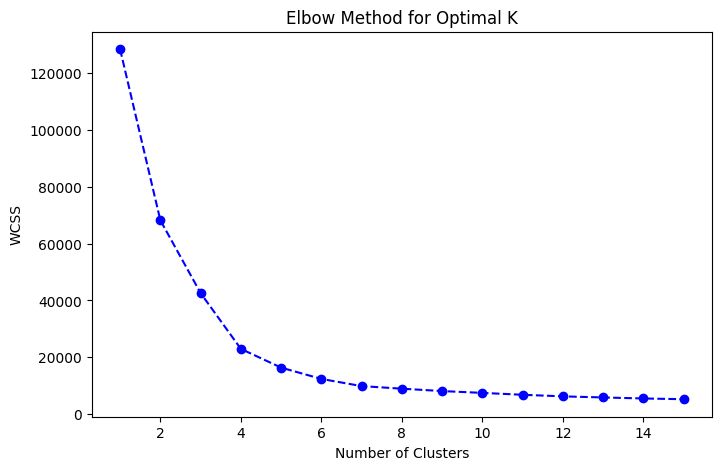

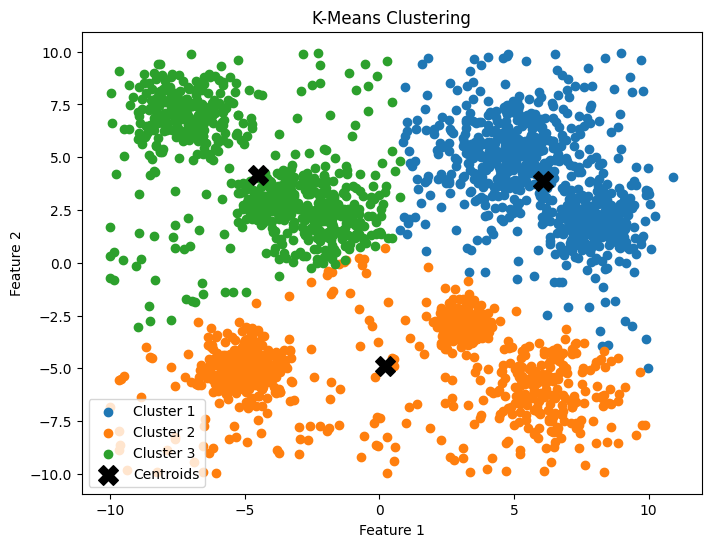

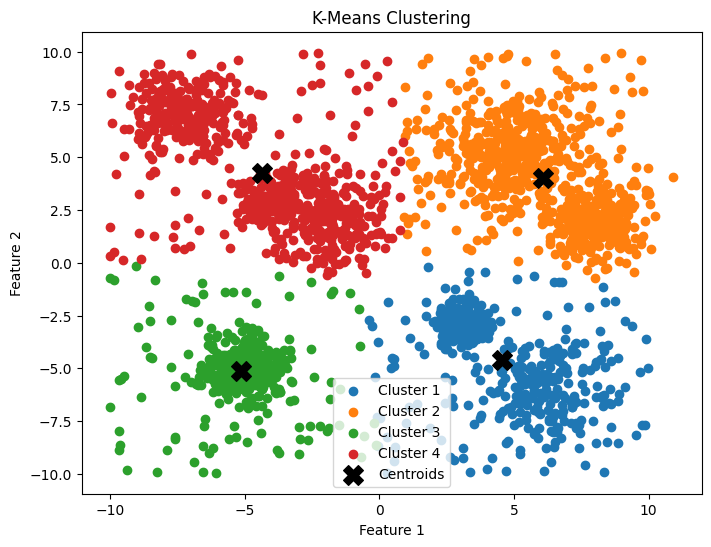

In [1]:
'''
EE708 Assignment 3
QUESTION 9
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Loading the dataset
file_path_kmeans = "A3_P1.csv"
kmeans_data = pd.read_csv(file_path_kmeans)

### K-MEANS CLUSTERING ###

#Extracting feature values (first two columns are features)
kmeans_features = kmeans_data.iloc[:, :2].values

#Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(kmeans_features)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

#Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 16), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

#From the elbow method graph, manually selecting a random number of clusters to show the clusters how it will be different from the optimal no. of clusters
k_optimal = 3  # Assume optimal K is 3; will update this based on the elbow plot manually

#K-Means Clustering
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10, max_iter=300)
kmeans_labels = kmeans.fit_predict(kmeans_features)

#Plot the clustering results
plt.figure(figsize=(8, 6))
for i in range(k_optimal):
    plt.scatter(kmeans_features[kmeans_labels == i, 0], kmeans_features[kmeans_labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='black', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


#from Plot, by ELbow Method, got optimum no. of clusters to be 4
k_optimal = 4  #updated based on the elbow plot

#Perform K-Means Clustering with optimal K
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10, max_iter=300)
kmeans_labels = kmeans.fit_predict(kmeans_features)

#Plot the final clustering results
plt.figure(figsize=(8, 6))
for i in range(k_optimal):
    plt.scatter(kmeans_features[kmeans_labels == i, 0], kmeans_features[kmeans_labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='black', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


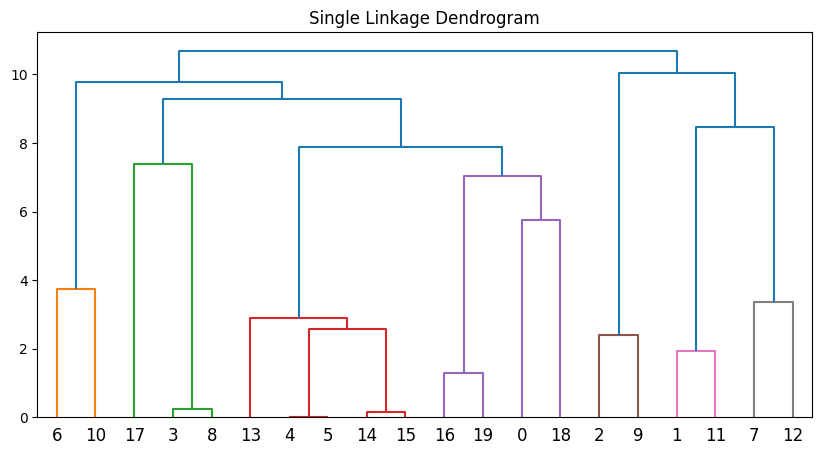

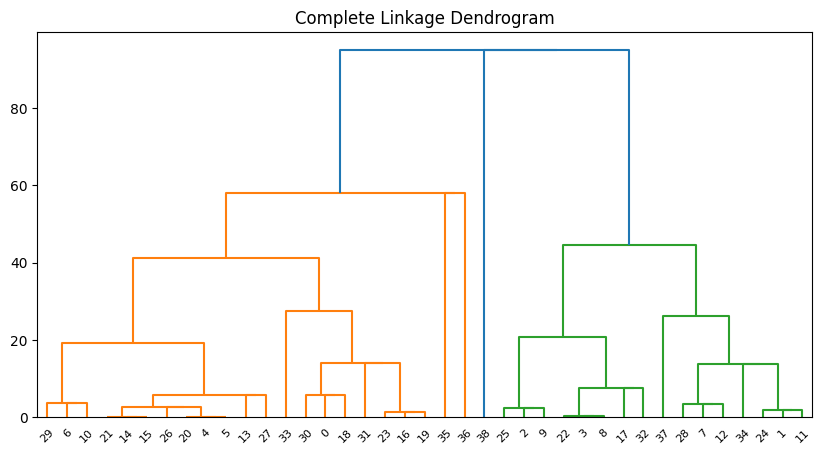

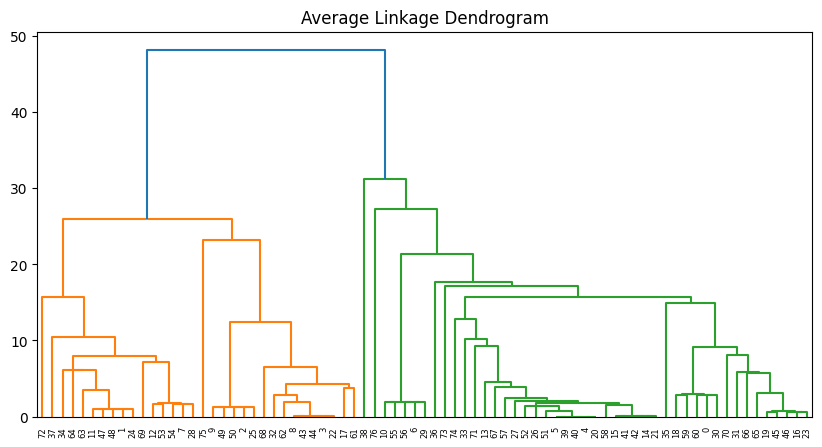

In [2]:
'''
EE708 Assignment 3
QUESTION 10
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram

#Load the dataset
file_path_hierarchical = "A3_P2.csv"
hierarchical_data = pd.read_csv(file_path_hierarchical)

def single_linkage_distance(cluster_a, cluster_b):
    """Compute single linkage distance between two clusters."""
    return min(euclidean(u, v) for u in cluster_a for v in cluster_b)

def complete_linkage_distance(cluster_a, cluster_b):
    """Compute complete linkage distance between two clusters."""
    return max(euclidean(u, v) for u in cluster_a for v in cluster_b)

def average_linkage_distance(cluster_a, cluster_b):
    """Compute average linkage distance between two clusters."""
    distances = [euclidean(u, v) for u in cluster_a for v in cluster_b]
    return sum(distances) / len(distances)

#Extracting features
hierarchical_features = hierarchical_data.iloc[:, :2].values

#Initial clusters (each data point starts as its own cluster)
clusters = {i: [hierarchical_features[i]] for i in range(len(hierarchical_features))}

#Function to perform hierarchical clustering and generate linkage matrix
def hierarchical_clustering(linkage_func):
    """Performing hierarchical clustering given a linkage function."""
    linkage_matrix = []
    cluster_labels = list(clusters.keys())
    next_cluster_id = len(cluster_labels)

    while len(cluster_labels) > 1:
        min_dist = float('inf')
        merge_idx = (-1, -1)

        #Find the two closest clusters
        for i in range(len(cluster_labels)):
            for j in range(i + 1, len(cluster_labels)):
                dist = linkage_func(clusters[cluster_labels[i]], clusters[cluster_labels[j]])
                if dist < min_dist:
                    min_dist = dist
                    merge_idx = (cluster_labels[i], cluster_labels[j])

        #Merge the two closest clusters
        i, j = merge_idx
        new_cluster = clusters[i] + clusters[j]
        linkage_matrix.append([i, j, min_dist, len(new_cluster)])

        #Update the cluster list
        clusters[next_cluster_id] = new_cluster
        cluster_labels.remove(i)
        cluster_labels.remove(j)
        cluster_labels.append(next_cluster_id)
        next_cluster_id += 1

    return np.array(linkage_matrix)

#Compute linkage matrices for different linkage methods
linkage_single = hierarchical_clustering(single_linkage_distance)
linkage_complete = hierarchical_clustering(complete_linkage_distance)
linkage_average = hierarchical_clustering(average_linkage_distance)

#Plot dendrograms
plt.figure(figsize=(10, 5))
dendrogram(linkage_single)
plt.title("Single Linkage Dendrogram")
plt.show()

plt.figure(figsize=(10, 5))
dendrogram(linkage_complete)
plt.title("Complete Linkage Dendrogram")
plt.show()

plt.figure(figsize=(10, 5))
dendrogram(linkage_average)
plt.title("Average Linkage Dendrogram")
plt.show()